In [24]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.ndimage import median_filter


In [25]:
# Load the Series of Dark Frames: Assuming the dark frames are stored as FITS files, load them into an array.
# List of filenames for the 10 dark frames
dark_frame_files = [r'../FITS_Files/3.2.3_10_dark_frames_30_sec.00000000.DARK.FIT', r'../FITS_Files/3.2.3_10_dark_frames_30_sec.00000001.DARK.FIT', r'../FITS_Files/3.2.3_10_dark_frames_30_sec.00000002.DARK.FIT', r'../FITS_Files/3.2.3_10_dark_frames_30_sec.00000003.DARK.FIT', r'../FITS_Files/3.2.3_10_dark_frames_30_sec.00000004.DARK.FIT',r'../FITS_Files/3.2.3_10_dark_frames_30_sec.00000005.DARK.FIT',r'../FITS_Files/3.2.3_10_dark_frames_30_sec.00000006.DARK.FIT',r'../FITS_Files/3.2.3_10_dark_frames_30_sec.00000007.DARK.FIT',r'../FITS_Files/3.2.3_10_dark_frames_30_sec.00000008.DARK.FIT',r'../FITS_Files/3.2.3_10_dark_frames_30_sec.00000009.DARK.FIT']

# Load the dark frames
dark_frames = [fits.getdata(f) for f in dark_frame_files]


In [26]:
# Create the Median Combined Master Dark Frame: 
# Compute the median value at each pixel 
# across the stack of 10 dark frames to generate the master dark frame.
master_dark = np.median(dark_frames, axis=0)

# Save the master dark frame as a new FITS file
fits.writeto('master_dark.fits', master_dark, overwrite=True)


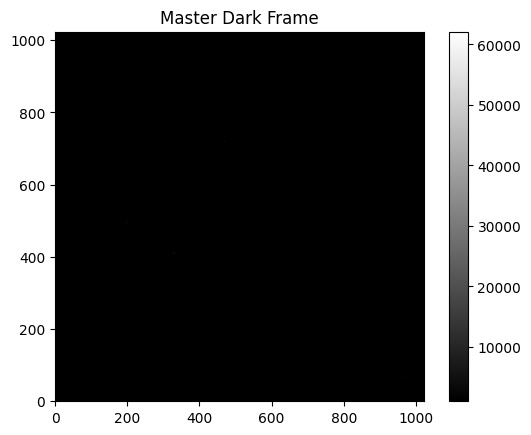

In [27]:
# Visualize the Master Dark Frame
# Plot the master dark frame to get a visual sense of the pixel values and hot pixels.
plt.imshow(master_dark, cmap='gray', origin='lower')
plt.colorbar()
plt.title('Master Dark Frame')
plt.show()


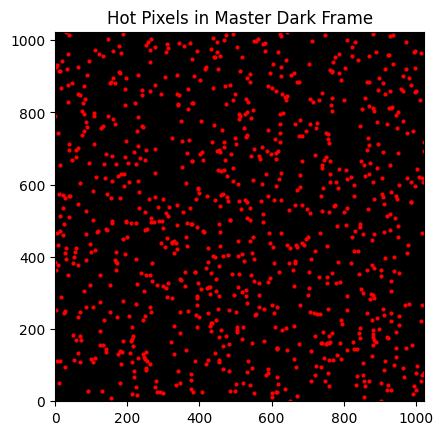

In [28]:
# Identify Hot Pixels: Hot pixels can be defined as 
# those that have significantly higher values compared to the surrounding pixels. 
# We can set a threshold (e.g., 5σ above the median) to identify hot pixels.
# Threshold for hot pixels (e.g., 5 times the standard deviation)
threshold = np.median(master_dark) + 5 * np.std(master_dark)

hot_pixels = np.where(master_dark > threshold)

# Plot the hot pixels on top of the master dark frame
plt.imshow(master_dark, cmap='gray', origin='lower')
plt.plot(hot_pixels[1], hot_pixels[0], 'ro', markersize=2)
plt.title('Hot Pixels in Master Dark Frame')
plt.show()


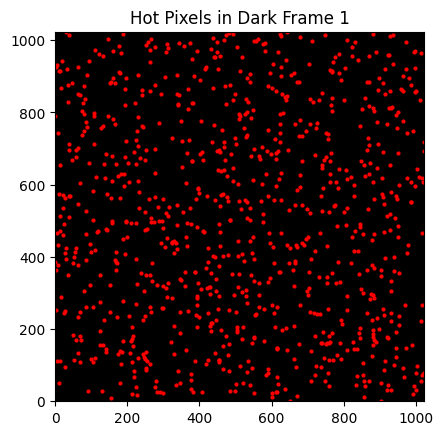

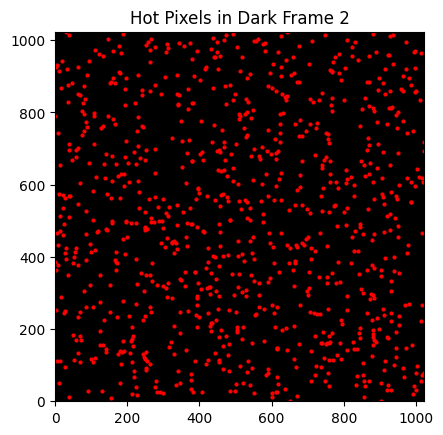

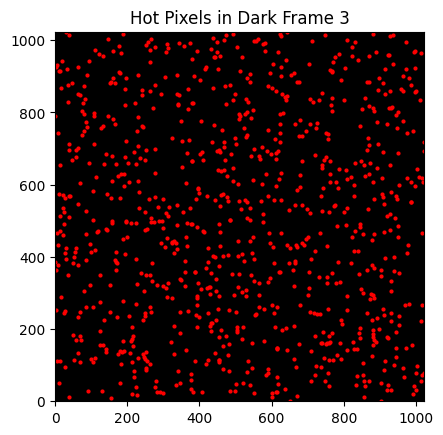

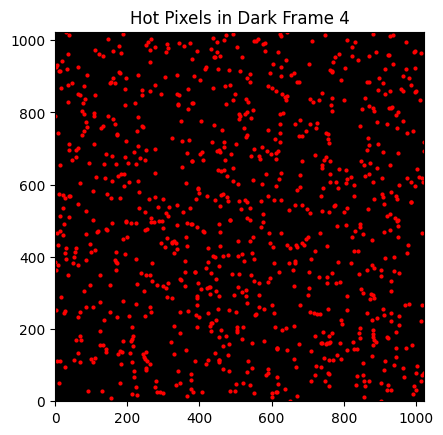

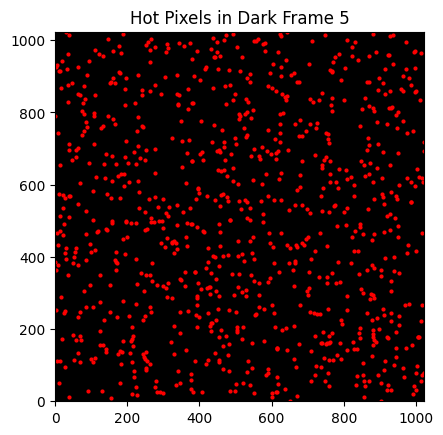

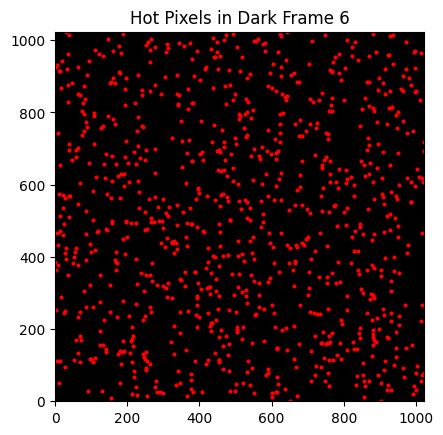

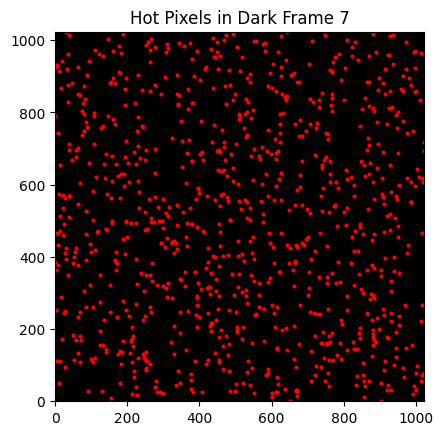

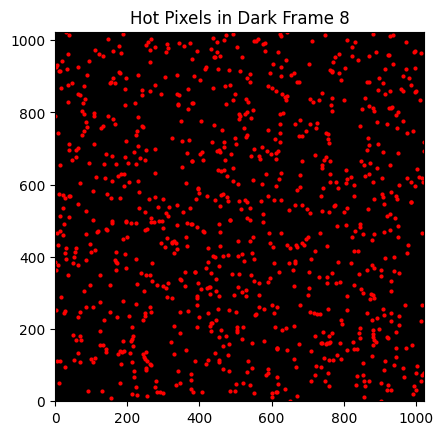

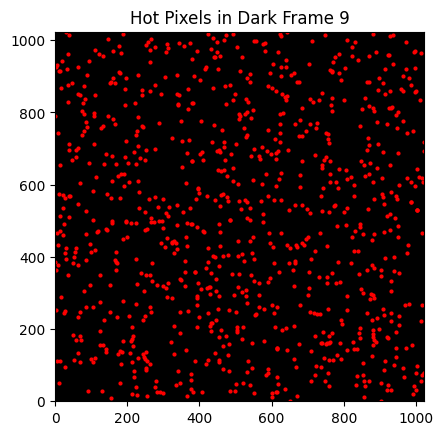

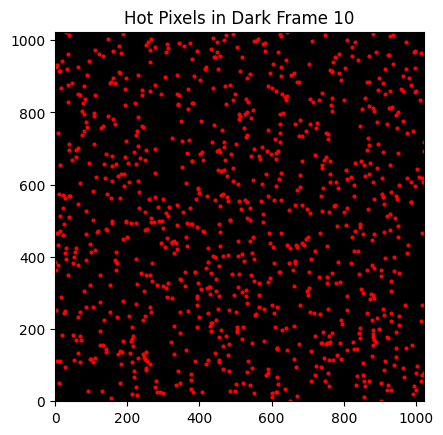

In [29]:
# Check Hot Pixels Across All Individual Dark Frames: 
# Check whether these hot pixels are consistently hot across all the individual dark frames.
for i, frame in enumerate(dark_frames):
    hot_in_frame = np.where(frame > threshold)
    plt.imshow(frame, cmap='gray', origin='lower')
    plt.plot(hot_in_frame[1], hot_in_frame[0], 'ro', markersize=2)
    plt.title(f'Hot Pixels in Dark Frame {i+1}')
    plt.show()
